In [3]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   -------- ------------------------------- 61.4/299.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if not already present
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
df = pd.read_csv(" Zomato Review Kaggle.csv")  # Replace with actual file path

# Display basic info
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


[nltk_data] Downloading package stopwords to C:\Users\Riya
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Riya
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  zomato_ratings = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  zomato_ratings = zomato_ratings.lower()
  zomato_ratings = zomato_ratings.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  zomato_ratings = [ps.stem(word) for word in zomato_ratings if not word in set(all_stopwords)]
  zomato_ratings = ' '.join(zomato_ratings)
  corpus.append(zomato_ratings)

[nltk_data] Downloading package stopwords to C:\Users\Riya
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [8]:
print("\nMissing Values:\n", df.isnull().sum())  # Counts missing values in each column



Missing Values:
 Review    0
Liked     0
dtype: int64


In [9]:
print("\nDataset Preview:\n", df.head())  # Shows the first 5 rows of data



Dataset Preview:
                                               Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


In [12]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters like @, #, !, etc.
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    words = word_tokenize(text)  # Split the text into words
    words = [word for word in words if word not in stopwords.words('english')]  # Remove common words like "the", "is", "and"
    return " ".join(words)  # Join words back into a single string


In [13]:
df['Cleaned_Review'] = df['Review'].astype(str).apply(clean_text)


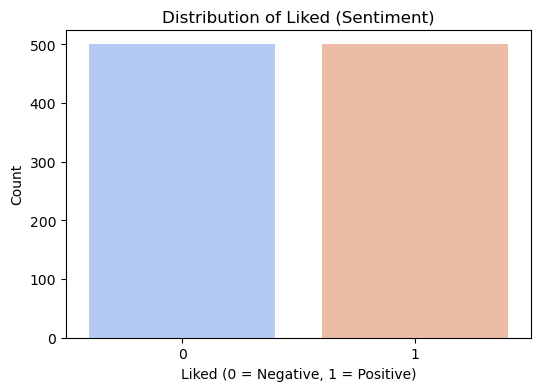

In [14]:
plt.figure(figsize=(6, 4))  # Set plot size
sns.countplot(x='Liked', data=df, palette="coolwarm")  # Plot count of 0s and 1s
plt.title("Distribution of Liked (Sentiment)")  # Add title
plt.xlabel("Liked (0 = Negative, 1 = Positive)")  # Label X-axis
plt.ylabel("Count")  # Label Y-axis
plt.show()  # Show the plot


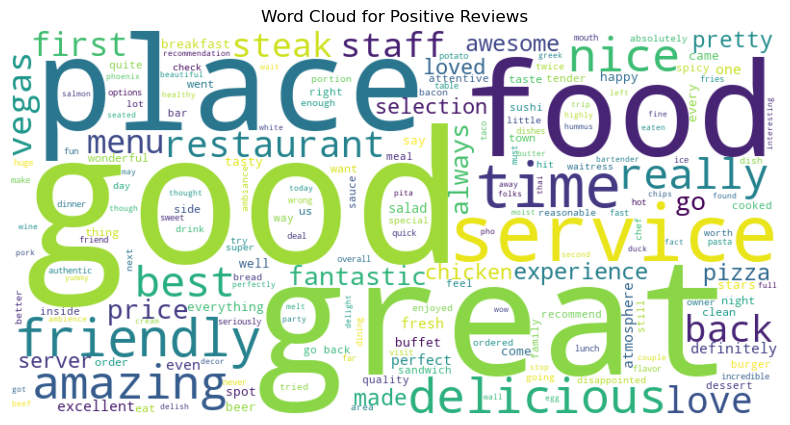

In [15]:
positive_text = " ".join(df[df['Liked'] == 1]['Cleaned_Review'])  # Combine all positive reviews into one string
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)  # Generate word cloud
plt.figure(figsize=(10, 5))  # Set plot size
plt.imshow(wordcloud, interpolation="bilinear")  # Show the word cloud
plt.axis("off")  # Hide axes
plt.title("Word Cloud for Positive Reviews")  # Add title
plt.show()  # Display the word cloud


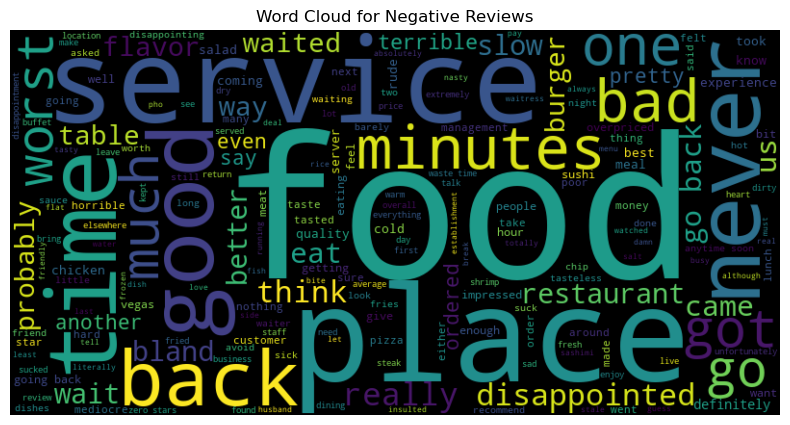

In [16]:
negative_text = " ".join(df[df['Liked'] == 0]['Cleaned_Review'])  # Combine all negative reviews
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()


In [17]:
all_words = " ".join(df['Cleaned_Review']).split()  # Get all words in the dataset
word_freq = Counter(all_words)  # Count the frequency of each word
most_common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Count'])  # Get top 20 words


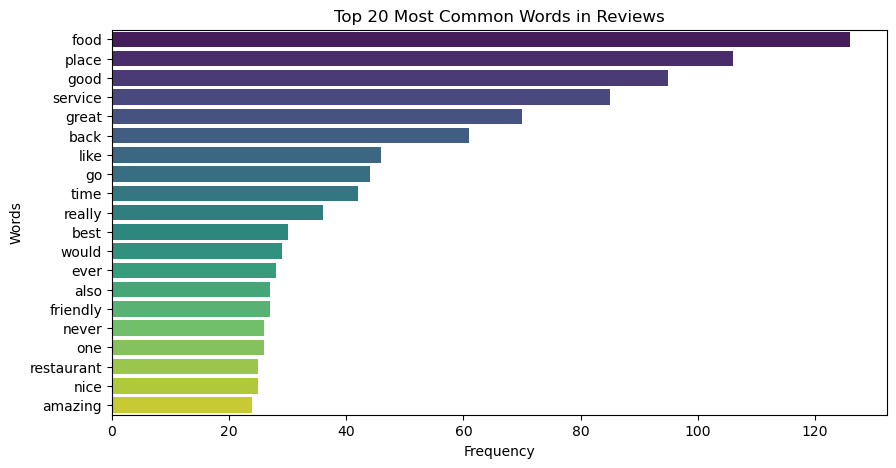

In [18]:
plt.figure(figsize=(10, 5))  # Set plot size
sns.barplot(x='Count', y='Word', data=most_common_words, palette="viridis")  # Create bar plot
plt.title("Top 20 Most Common Words in Reviews")  # Add title
plt.xlabel("Frequency")  # Label X-axis
plt.ylabel("Words")  # Label Y-axis
plt.show()  # Display the plot


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21)

In [27]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[56 46]
 [12 86]]


0.71